# Importing

In [42]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
# from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
# from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

df= pd.read_csv('./Carseats.csv') #此处注意
df.describe()



,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# Functions and intializations

In [43]:
def YN_cvt(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0
    
def BMG_cvt(x):
    if x == "Bad":
        return 0
    elif x == "Medium":
        return 1
    elif x == "Good":
        return 2
    
def sse(tr, pred):
    return np.sum((pred - tr) **2)


df["Urban"] = df['Urban'].apply(YN_cvt)
df["US"] = df["US"].apply(YN_cvt)
df["ShelveLoc"] = df["ShelveLoc"].apply(BMG_cvt)
df["Urban"], df["US"], df["ShelveLoc"]

(0      1
 1      1
 2      1
 3      1
 4      1
       ..
 395    1
 396    0
 397    1
 398    1
 399    1
 Name: Urban, Length: 400, dtype: int64,
 0      1
 1      1
 2      1
 3      1
 4      0
       ..
 395    1
 396    1
 397    1
 398    1
 399    1
 Name: US, Length: 400, dtype: int64,
 0      0
 1      2
 2      1
 3      1
 4      0
       ..
 395    2
 396    1
 397    1
 398    0
 399    2
 Name: ShelveLoc, Length: 400, dtype: int64)

# Data handling

In [44]:
data_tr = df[0:300].copy()
data_te = df[300:400].copy()

x_tr = data_tr.iloc[:,1:]
y_tr = data_tr.iloc[:,0]
# y_tr
x_te = data_te.iloc[:,1:]
y_te = data_te.iloc[:,0].reset_index()
y_te = y_te['Sales']

y_tr
y_te
# x_tr["Urban"] = YN_cvt(_tr["Urban"])


0      8.57
1      7.41
2      5.28
3     10.01
4     11.93
      ...  
95    12.57
96     6.14
97     7.41
98     5.94
99     9.71
Name: Sales, Length: 100, dtype: float64

# Data Analysis and Visualization

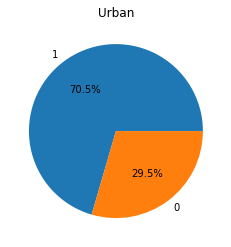

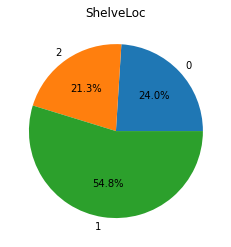

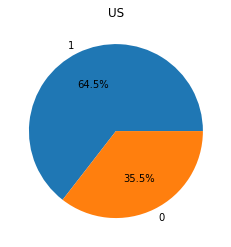

In [45]:
label_lst = list(df['Urban'].unique())
value = []
for i in label_lst:
    value.append(df['Urban'][df['Urban']==i].count())

plt.pie(value,labels = label_lst,autopct = '%.1f%%')
plt.title('Urban')
plt.show()

label_lst = list(df['ShelveLoc'].unique())
value = []
for i in label_lst:
    value.append(df['ShelveLoc'][df['ShelveLoc']==i].count())

plt.pie(value,labels = label_lst,autopct = '%.1f%%')
plt.title('ShelveLoc')
plt.show()

label_lst = list(df['US'].unique())
value = []
for i in label_lst:
    value.append(df['US'][df['US']==i].count())

# fig = plt.figure()
plt.pie(value,labels = label_lst,autopct = '%.1f%%')
plt.title('US')
plt.show()

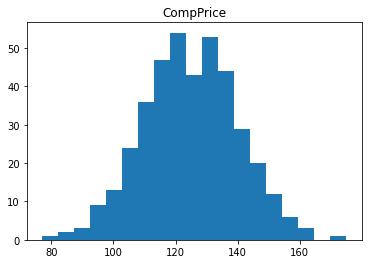

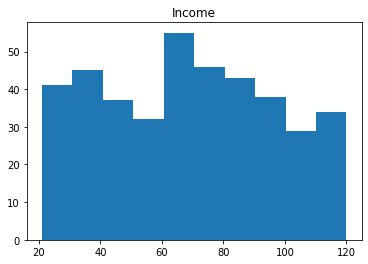

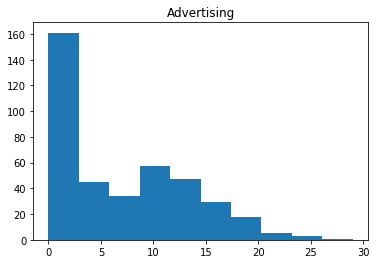

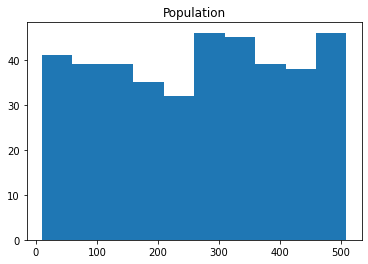

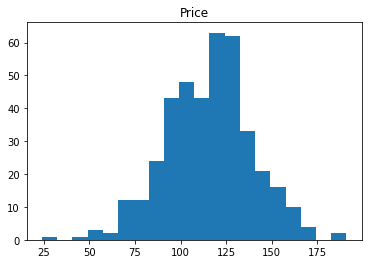

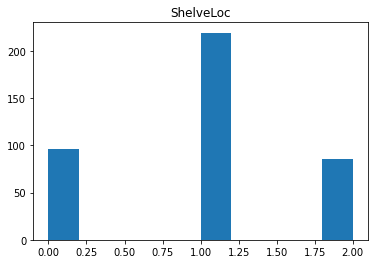

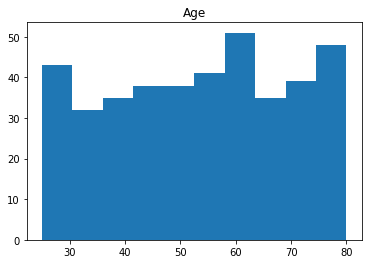

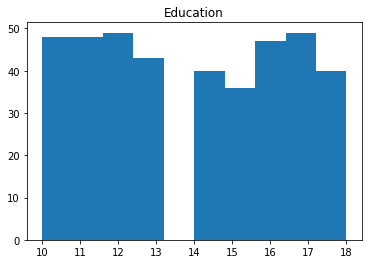

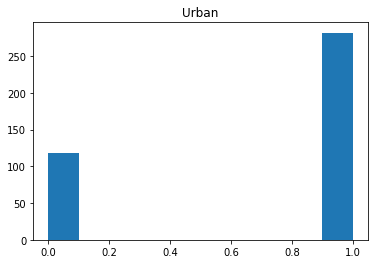

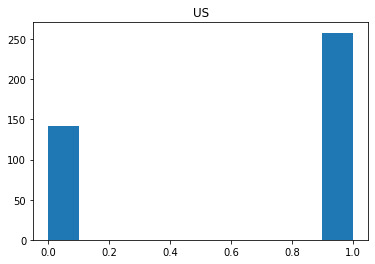

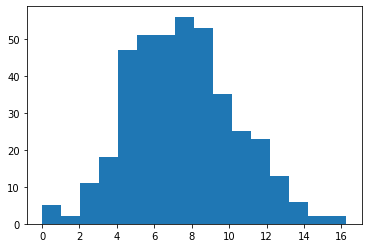

In [46]:
features = df.iloc[:, 1:].values
labels = df['Sales'].values
col = features.shape[1]
col_names = df.columns[1:]
for i in range(col):
    plt.figure(i+1)
    _ = plt.hist(features[:, i], bins='auto')
    plt.title(col_names[i])
    plt.show()
plt.figure(col+1)
_ = plt.hist(labels, bins='auto')  # arguments are passed to np.histogram

# Deicision Tree

max_depth =  2 , train loss =  1408.9682334249082 , leafnodeSize =   2 , test loss =  536.5247997713976


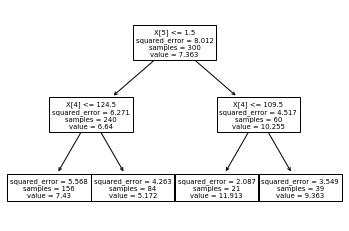

max_depth =  2 , train loss =  1408.9682334249082 , leafnodeSize =   3 , test loss =  536.5247997713976


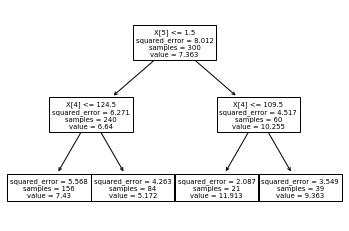

max_depth =  2 , train loss =  1408.9682334249082 , leafnodeSize =   4 , test loss =  536.5247997713976


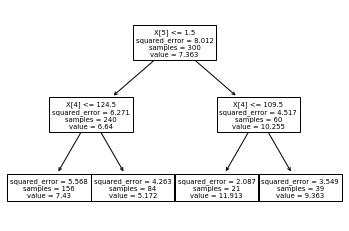

max_depth =  2 , train loss =  1408.9682334249082 , leafnodeSize =   5 , test loss =  536.5247997713974


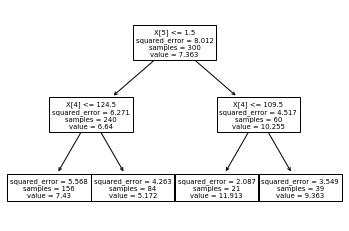

max_depth =  2 , train loss =  1408.9682334249082 , leafnodeSize =   6 , test loss =  536.5247997713976


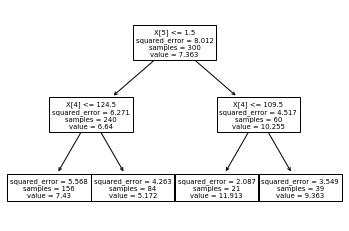

max_depth =  2 , train loss =  1408.9682334249085 , leafnodeSize =   7 , test loss =  536.5247997713974


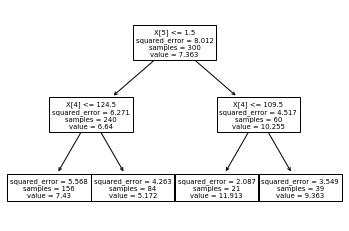

max_depth =  2 , train loss =  1408.9682334249082 , leafnodeSize =   8 , test loss =  536.5247997713975


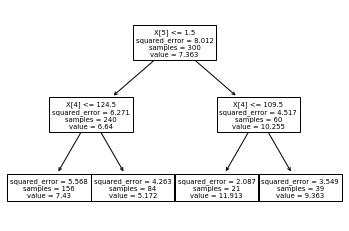

max_depth =  2 , train loss =  1408.9682334249085 , leafnodeSize =   9 , test loss =  536.5247997713975


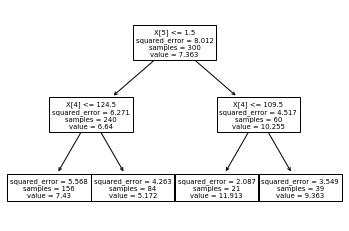

max_depth =  3 , train loss =  1150.8433811779294 , leafnodeSize =   2 , test loss =  567.6722963676141


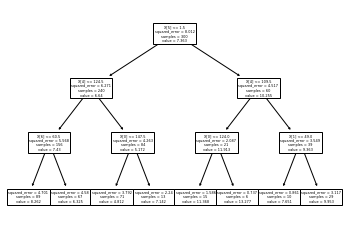

max_depth =  3 , train loss =  1150.8433811779294 , leafnodeSize =   3 , test loss =  567.672296367614


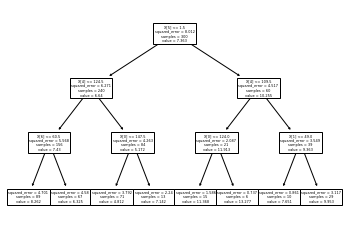

max_depth =  3 , train loss =  1150.8433811779296 , leafnodeSize =   4 , test loss =  567.672296367614


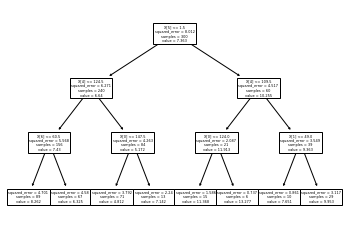

max_depth =  3 , train loss =  1150.8433811779294 , leafnodeSize =   5 , test loss =  567.672296367614


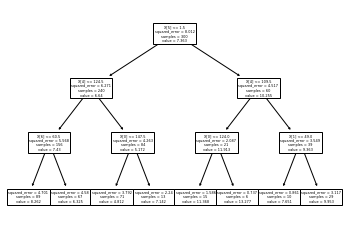

max_depth =  3 , train loss =  1150.8433811779294 , leafnodeSize =   6 , test loss =  567.672296367614


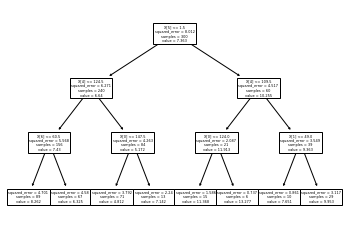

max_depth =  3 , train loss =  1154.2522364160245 , leafnodeSize =   7 , test loss =  569.0718186351876


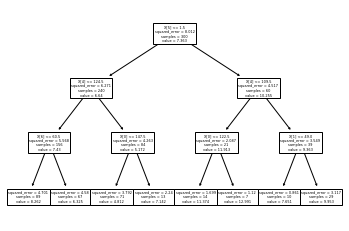

max_depth =  3 , train loss =  1157.3856550668183 , leafnodeSize =   8 , test loss =  562.1385578027993


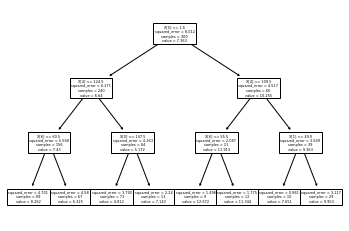

max_depth =  3 , train loss =  1157.3856550668183 , leafnodeSize =   9 , test loss =  562.1385578027991


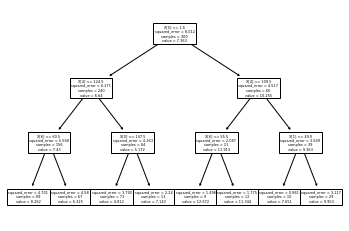

max_depth =  4 , train loss =  849.0020099248911 , leafnodeSize =   2 , test loss =  538.346446191196


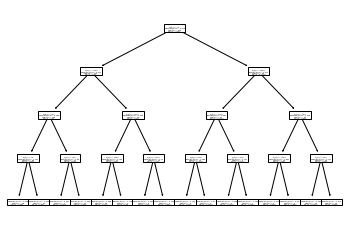

max_depth =  4 , train loss =  849.2933515915578 , leafnodeSize =   3 , test loss =  539.6853427189739


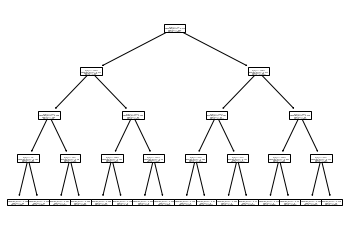

max_depth =  4 , train loss =  851.7000182582244 , leafnodeSize =   4 , test loss =  543.5697871634185


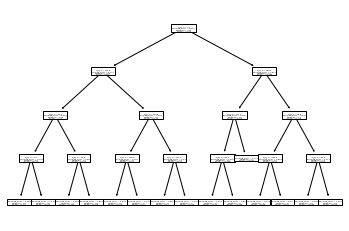

max_depth =  4 , train loss =  852.4751501143433 , leafnodeSize =   5 , test loss =  517.3268978343206


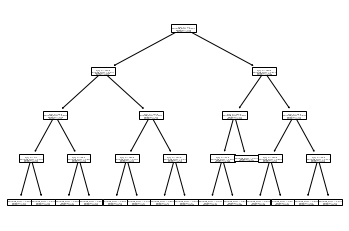

max_depth =  4 , train loss =  890.1026719964543 , leafnodeSize =   6 , test loss =  521.5036144682238


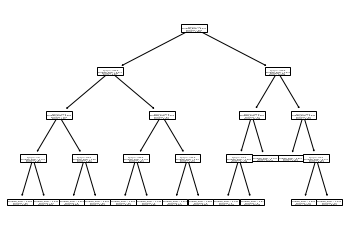

max_depth =  4 , train loss =  929.7497821796044 , leafnodeSize =   7 , test loss =  505.9176338093526


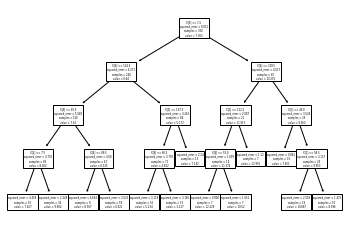

max_depth =  4 , train loss =  943.1004579732551 , leafnodeSize =   8 , test loss =  506.77789950757636


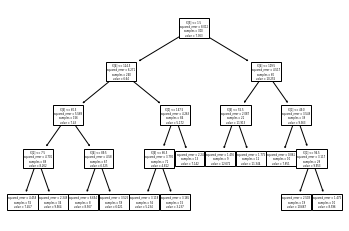

max_depth =  4 , train loss =  948.2376811542174 , leafnodeSize =   9 , test loss =  540.1050098205513


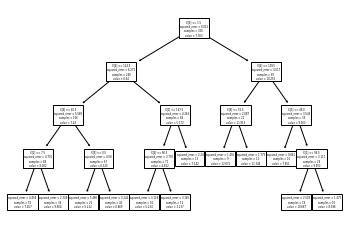

max_depth =  5 , train loss =  626.6256072417464 , leafnodeSize =   2 , test loss =  505.92075502804374


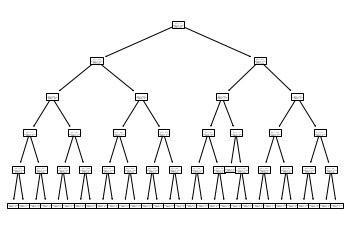

max_depth =  5 , train loss =  642.3325795036511 , leafnodeSize =   3 , test loss =  508.878064882352


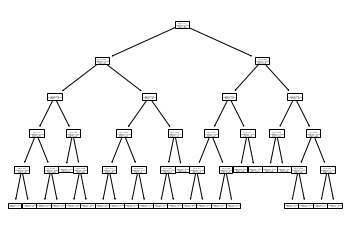

max_depth =  5 , train loss =  651.5763280750796 , leafnodeSize =   4 , test loss =  486.73459166693266


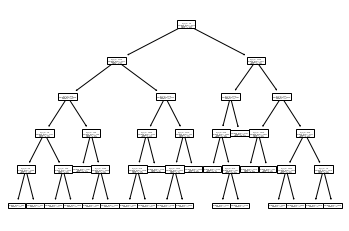

max_depth =  5 , train loss =  659.5963183403858 , leafnodeSize =   5 , test loss =  469.3631955626325


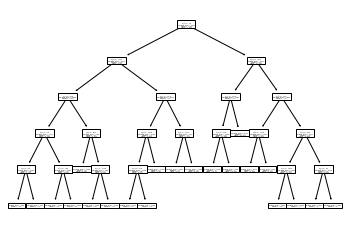

max_depth =  5 , train loss =  705.9414536603308 , leafnodeSize =   6 , test loss =  493.05533875353615


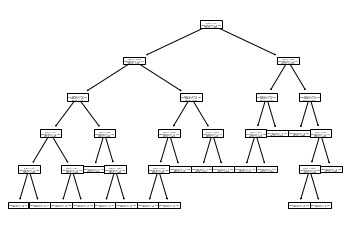

max_depth =  5 , train loss =  736.1812602368111 , leafnodeSize =   7 , test loss =  469.3096648610074


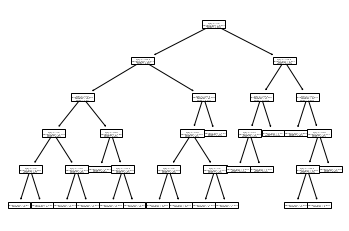

max_depth =  5 , train loss =  760.4121265066524 , leafnodeSize =   8 , test loss =  470.54886207850535


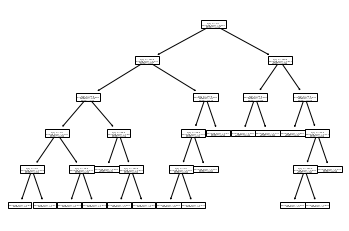

max_depth =  5 , train loss =  720.9525355024282 , leafnodeSize =   9 , test loss =  506.1259257650933


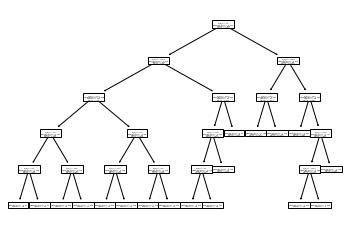

max_depth =  6 , train loss =  429.95455024174356 , leafnodeSize =   2 , test loss =  496.5093091471789


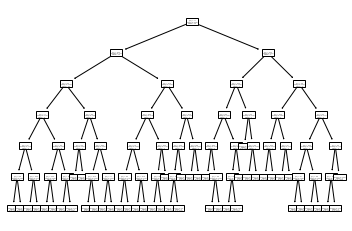

max_depth =  6 , train loss =  452.3544860353944 , leafnodeSize =   3 , test loss =  476.7830520424926


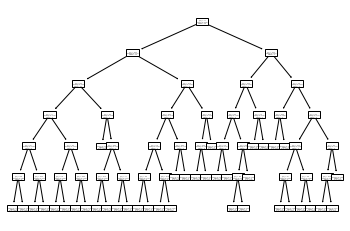

max_depth =  6 , train loss =  471.6547315115848 , leafnodeSize =   4 , test loss =  456.88753457423866


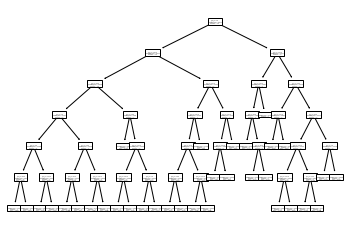

max_depth =  6 , train loss =  492.57434522190226 , leafnodeSize =   5 , test loss =  447.5146039827405


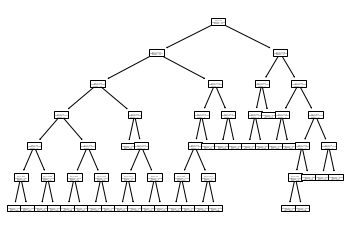

max_depth =  6 , train loss =  558.4150242837279 , leafnodeSize =   6 , test loss =  471.6403816808983


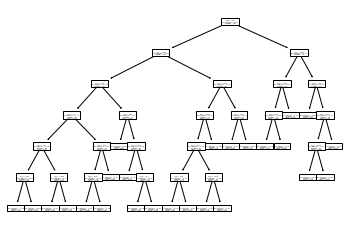

max_depth =  6 , train loss =  596.9474766490176 , leafnodeSize =   7 , test loss =  453.5706601247872


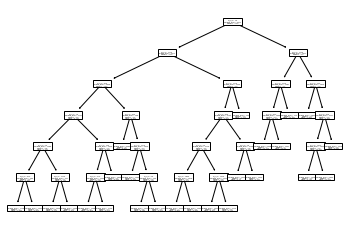

max_depth =  6 , train loss =  633.051210534299 , leafnodeSize =   8 , test loss =  458.55791023228437


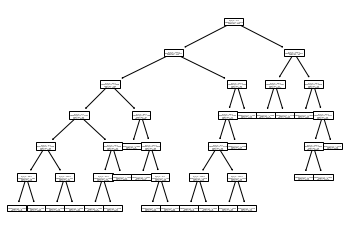

max_depth =  6 , train loss =  622.746381988123 , leafnodeSize =   9 , test loss =  499.3891052618803


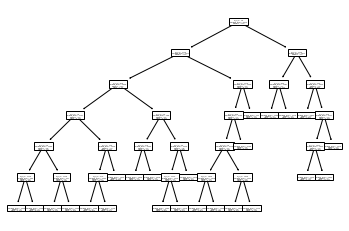

max_depth =  7 , train loss =  264.53447847114 , leafnodeSize =   2 , test loss =  542.7176133267478


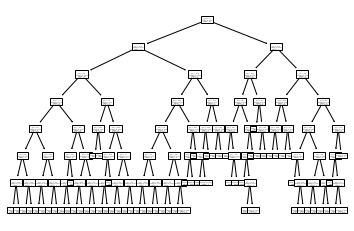

max_depth =  7 , train loss =  299.1425416060606 , leafnodeSize =   3 , test loss =  486.8431171862527


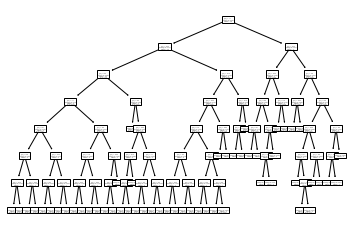

max_depth =  7 , train loss =  347.8795954155844 , leafnodeSize =   4 , test loss =  462.2288792763888


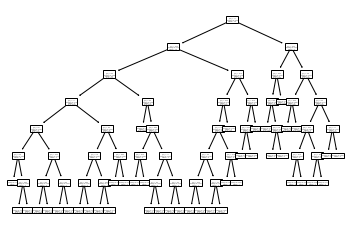

max_depth =  7 , train loss =  379.18617065367965 , leafnodeSize =   5 , test loss =  464.1614978411405


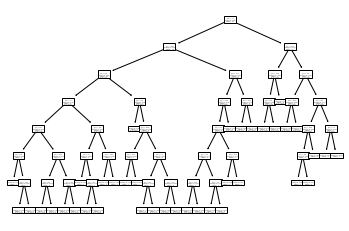

max_depth =  7 , train loss =  446.9709766926407 , leafnodeSize =   6 , test loss =  488.0413379032042


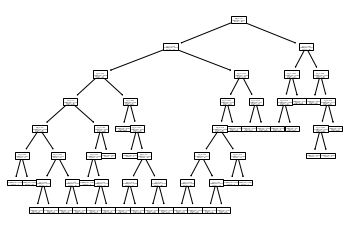

max_depth =  7 , train loss =  522.05518999556 , leafnodeSize =   7 , test loss =  462.928642123699


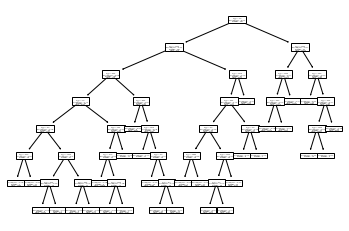

max_depth =  7 , train loss =  575.4593543570319 , leafnodeSize =   8 , test loss =  465.98641054185356


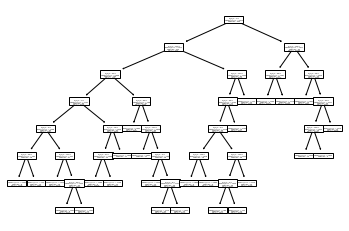

max_depth =  7 , train loss =  584.9096710950162 , leafnodeSize =   9 , test loss =  500.295964857409


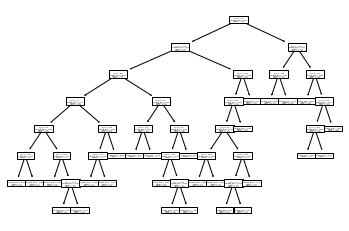

max_depth =  8 , train loss =  144.7362731547619 , leafnodeSize =   2 , test loss =  512.2544679924454


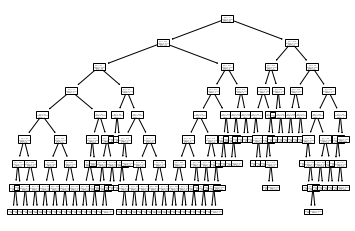

max_depth =  8 , train loss =  192.9059343452381 , leafnodeSize =   3 , test loss =  504.7595839340553


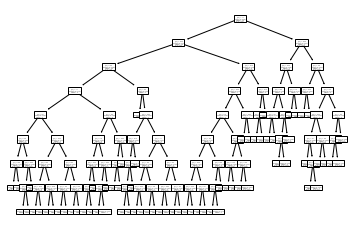

max_depth =  8 , train loss =  294.3543475992064 , leafnodeSize =   4 , test loss =  472.4350745084445


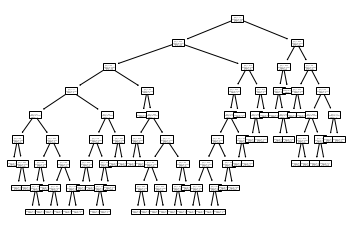

max_depth =  8 , train loss =  338.1131095039682 , leafnodeSize =   5 , test loss =  462.21018026764057


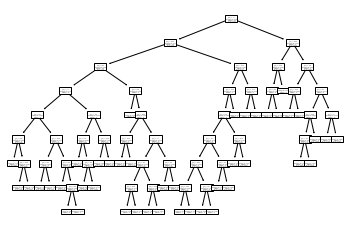

max_depth =  8 , train loss =  417.7528622705438 , leafnodeSize =   6 , test loss =  485.06716597378994


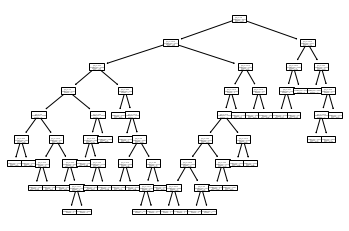

max_depth =  8 , train loss =  500.88609194916194 , leafnodeSize =   7 , test loss =  466.68410586559054


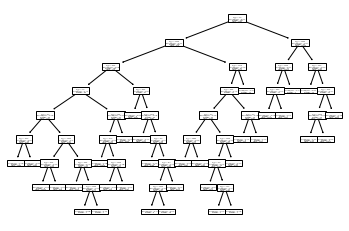

max_depth =  8 , train loss =  567.733070596348 , leafnodeSize =   8 , test loss =  466.8378666306841


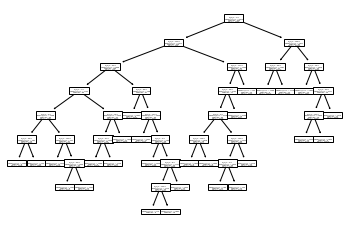

max_depth =  8 , train loss =  584.9096710950162 , leafnodeSize =   9 , test loss =  500.29596485740893


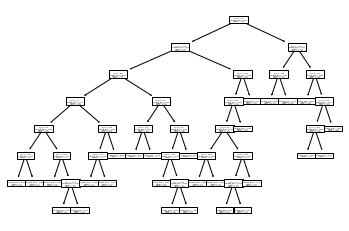

max_depth =  9 , train loss =  98.9508750865801 , leafnodeSize =   2 , test loss =  524.8688612448371


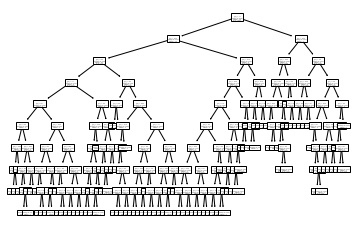

max_depth =  9 , train loss =  170.71271484848484 , leafnodeSize =   3 , test loss =  497.5131842913222


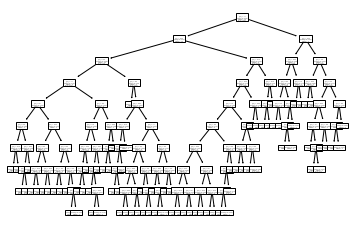

max_depth =  9 , train loss =  280.21902437229437 , leafnodeSize =   4 , test loss =  460.73885856966706


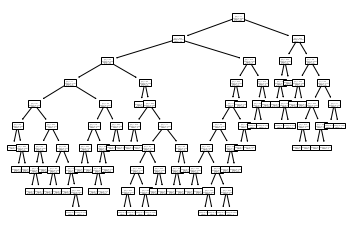

max_depth =  9 , train loss =  329.1910015548341 , leafnodeSize =   5 , test loss =  453.6876031506225


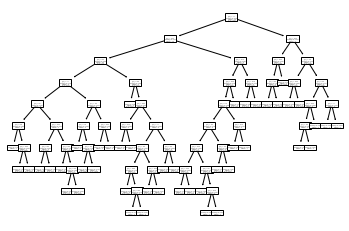

max_depth =  9 , train loss =  409.319455494228 , leafnodeSize =   6 , test loss =  482.62191631896826


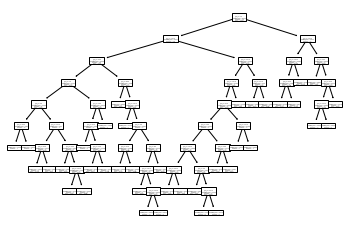

max_depth =  9 , train loss =  498.06181972693975 , leafnodeSize =   7 , test loss =  463.9650231495412


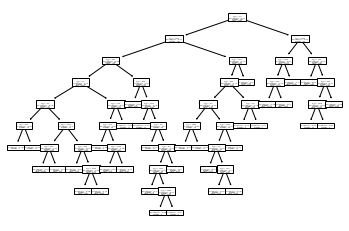

max_depth =  9 , train loss =  564.9087983741258 , leafnodeSize =   8 , test loss =  464.11878391463466


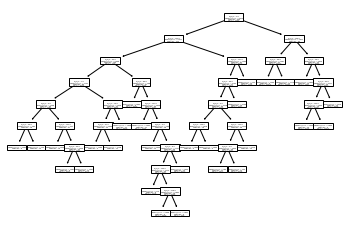

max_depth =  9 , train loss =  584.9096710950162 , leafnodeSize =   9 , test loss =  500.295964857409


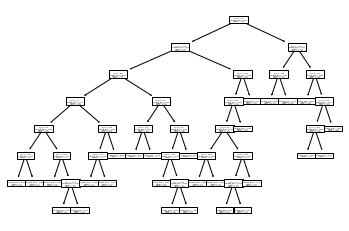

In [47]:
depths = [i for i in range(2,10)]
leaves = [j for j in range(2,10)]
# x_tr, x_te = df.iloc[:, 1:].values
# y_tr, y_te = df['Sales'].values
for depth in depths:
    for leaf in leaves:
        reg = tree.DecisionTreeRegressor(max_depth = depth, min_samples_leaf = leaf)
        # print(x_tr)
        reg.fit(x_tr, y_tr)
        pred_tr = reg.predict(x_tr)
        pred_te = reg.predict(x_te)
        print("max_depth = ", depth, ", train loss = ", sse(y_tr, pred_tr), \
            ", leafnodeSize =  ", leaf,", test loss = ",sse(y_te, pred_te))
        # pd.DataFrame  
        tree.plot_tree(reg)
        plt.show()

# Bagging

In [48]:
depths = [i for i in range(2,10)]
tree_nums = [j for j in range(10, 501, 10)]
least_test_loss = 9999
for depth in depths:
    base_est = tree.DecisionTreeRegressor(max_depth= depth)
    for num in tree_nums:
        reg = BaggingRegressor(base_estimator=base_est, n_estimators=num).fit(x_tr, y_tr)
        pred_tr = reg.predict(x_tr)
        pred_te = reg.predict(x_te)
        test_loss = sse(y_te, pred_te)
        if test_loss < least_test_loss:
            least_test_loss = test_loss
            parameter_lst = [depth, num]
        print("max_depth = ", depth, ", train loss = ", sse(y_tr, pred_tr), \
            ", tree_number =  ", num,", test loss = ",test_loss)
print (least_test_loss )
print (parameter_lst)

max_depth =  2 , train loss =  1286.24163526328 , tree_number =   10 , test loss =  464.4750467454912
max_depth =  2 , train loss =  1305.3544220202125 , tree_number =   20 , test loss =  482.382475912524
max_depth =  2 , train loss =  1288.2052264044419 , tree_number =   30 , test loss =  445.51820550254234
max_depth =  2 , train loss =  1294.1422872998896 , tree_number =   40 , test loss =  468.46764506912916
max_depth =  2 , train loss =  1286.117674998788 , tree_number =   50 , test loss =  467.65306381557656
max_depth =  2 , train loss =  1293.704408709229 , tree_number =   60 , test loss =  471.81015914076045
max_depth =  2 , train loss =  1277.2759652390414 , tree_number =   70 , test loss =  465.45670296076656
max_depth =  2 , train loss =  1247.007621094915 , tree_number =   80 , test loss =  450.0845368933944
max_depth =  2 , train loss =  1284.5884679085555 , tree_number =   90 , test loss =  454.1575530078595
max_depth =  2 , train loss =  1278.801014716433 , tree_number = 

# Random Forest

In [49]:
m_fs = [i for i in range(1,10)]
tree_nums = [j for j in range(50, 240, 10)]
# print(tree_nums)
least_test_loss = 9999
for m in m_fs:
    for tree_num in tree_nums:
        reg = RandomForestRegressor(n_estimators=tree_num, max_features=m).fit(x_tr,y_tr)
        pred_tr = reg.predict(x_tr)
        pred_te = reg.predict(x_te)
        test_loss = sse(y_te, pred_te)
        if test_loss < least_test_loss:
            least_test_loss = test_loss
            parameter_lst = [m, tree_num]
        print("max feature = ", m, ", train loss = ", sse(y_tr, pred_tr), \
            ", tree_number =  ", tree_num,", test loss = ",test_loss)
print (least_test_loss )
print (parameter_lst)

max feature =  1 , train loss =  195.21141903999995 , tree_number =   50 , test loss =  407.95343784000005
max feature =  1 , train loss =  157.3900790555556 , tree_number =   60 , test loss =  383.51250477777774
max feature =  1 , train loss =  173.20247144897968 , tree_number =   70 , test loss =  418.14715020408164
max feature =  1 , train loss =  172.36627573437505 , tree_number =   80 , test loss =  388.18756179687495
max feature =  1 , train loss =  179.39597500000005 , tree_number =   90 , test loss =  367.6047882839507
max feature =  1 , train loss =  169.57150084 , tree_number =   100 , test loss =  408.27985801000005
max feature =  1 , train loss =  181.33588829752068 , tree_number =   110 , test loss =  398.81862797520665
max feature =  1 , train loss =  173.25342793749996 , tree_number =   120 , test loss =  421.1417267777779
max feature =  1 , train loss =  177.00444598816546 , tree_number =   130 , test loss =  403.15268524260324
max feature =  1 , train loss =  167.78757

# Bias and Variance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


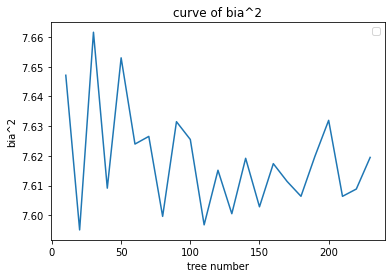

In [59]:
x1_list = []
x2_list = []
x3_list = []
tree_nums = [j for j in range(10, 240, 10)]

def calc_h_mean(array,size):
    h = []
    for i in range(size):
        value = 0
        for j in range(len(array)):
            value += array[j][i]
        h.append(value/len(array))
    return h

for tree_num in tree_nums:
    x1_list.append(tree_num)
    var = 0
    b_square = 0    
    clf = RandomForestRegressor(n_estimators=tree_num, max_features=6)
    clf.fit(x_tr, y_tr)
    pred_y = clf.predict(x_te)
    mean_y = np.full(100, np.mean(pred_y, axis=0))
    b_square += mean_squared_error(y_te, mean_y)
    var += mean_squared_error(pred_y, mean_y)
    x2_list.append(b_square)
    x3_list.append(var)
        
        
        
        
        
    


plt.plot(x1_list, x2_list)
plt.xlabel("tree number")
plt.ylabel("bia^2")
plt.title("curve of bia^2")
# plt.plot
# plt.xlim(0,250)
# plt.ylim(7.0, 8.0)
plt.legend()
plt.show()





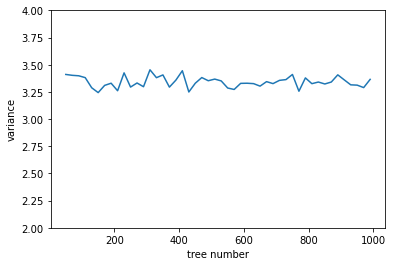

In [57]:
plt.plot(x1_list, x3_list)
plt.xlabel("tree number")
plt.ylabel("variance")

plt.ylim(2.0, 4.0)
# plt.legend
plt.show()